<a href="https://colab.research.google.com/github/ingugi/MMAI831-Finance/blob/main/Irene_Question_3_Using_Session_3_Stock_Price_Predict_LSTM_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Can We Predict the Stock Price Movement in the Future?
YOu can read the article explaining how LSTM works [here](https://web.stanford.edu/class/cs379c/archive/2018/class_messages_listing/content/Artificial_Neural_Network_Technology_Tutorials/OlahLSTM-NEURAL-NETWORK-TUTORIAL-15.pdf)

## Is the stock a random walk?

## Long Short Term Memory 



1. Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


2. Download the data from yahoo. We use ANZN

In [2]:
import importlib.util
package_name = 'yfinance'
spec = importlib.util.find_spec(package_name)
if spec is None:
    print(package_name +" is not installed")
    !pip install yfinance

import yfinance as yf
df=yf.download(['AMZN', 'GOOG'], start='2012-01-01', end='2023-02-10')

df

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AMZN        GOOG        AMZN        GOOG        AMZN   
Date                                                                     
2012-01-03    8.951500   16.573130    8.951500   16.573130    8.974000   
2012-01-04    8.875500   16.644611    8.875500   16.644611    9.025000   
2012-01-05    8.880500   16.413727    8.880500   16.413727    8.912500   
2012-01-06    9.130500   16.189817    9.130500   16.189817    9.232500   
2012-01-09    8.928000   15.503389    8.928000   15.503389    9.218500   
...                ...         ...         ...         ...         ...   
2023-02-03  103.389999  105.220001  103.389999  105.220001  108.779999   
2023-02-06  102.180000  103.470001  102.180000  103.470001  103.949997   
2023-02-07  102.110001  108.040001  102.110001  108.040001  102.410004   
2023-02-08  100.050003  100.000000  100.050003  100.000000  102.669998   
2023-02-09   98.239998   95.459999   98.239998   95.459999  101.779999   

                               Low                    Open              \
                  GOOG        AMZN        GOOG        AMZN        GOOG   
Date                                                                     
2012-01-03   16.641375    8.777500   16.248346    8.794500   16.262545   
2012-01-04   16.693678    8.803500   16.453827    8.960500   16.563665   
2012-01-05   16.537264    8.702500   16.344486    8.797000   16.491436   
2012-01-06   16.438385    8.875000   16.184088    8.903500   16.417213   
2012-01-09   16.114599    8.850000   15.472754    9.138000   16.102144   
...                ...         ...         ...         ...         ...   
2023-02-03  108.019997  102.519997  103.300003  105.260002  103.510002   
2023-02-06  104.699997  100.650002  102.209999  102.930000  102.684998   
2023-02-07  108.669998   98.080002  103.547997  101.169998  103.629997   
2023-02-08  103.580002   98.779999   98.455002  102.040001  102.690002   
2023-02-09  100.610001   97.570000   93.860001  101.320000  100.540001   

               Volume             
                 AMZN       GOOG  
Date                              
2012-01-03  102216000  147611217  
2012-01-04   84104000  114989399  
2012-01-05   76182000  131808205  
2012-01-06  140168000  108119746  
2012-01-09  101138000  233776981  
...               ...        ...  
2023-02-03  144374800   36823400  
2023-02-06   81945200   25573000  
2023-02-07  119501300   33738800  
2023-02-08   75878300   73546000  
2023-02-09   64622500   97798600  

[2795 rows x 12 columns]

In [3]:
df.shape

(2795, 12)

3. Visualize

In [4]:
df['Close'].tail(10)

,AMZN,GOOG
Date,,
2023-01-27,102.239998,100.709999
2023-01-30,100.550003,97.949997
2023-01-31,103.129997,99.870003
2023-02-01,105.150002,101.430000
2023-02-02,112.910004,108.800003
2023-02-03,103.389999,105.220001
2023-02-06,102.180000,103.470001
2023-02-07,102.110001,108.040001
2023-02-08,100.050003,100.000000


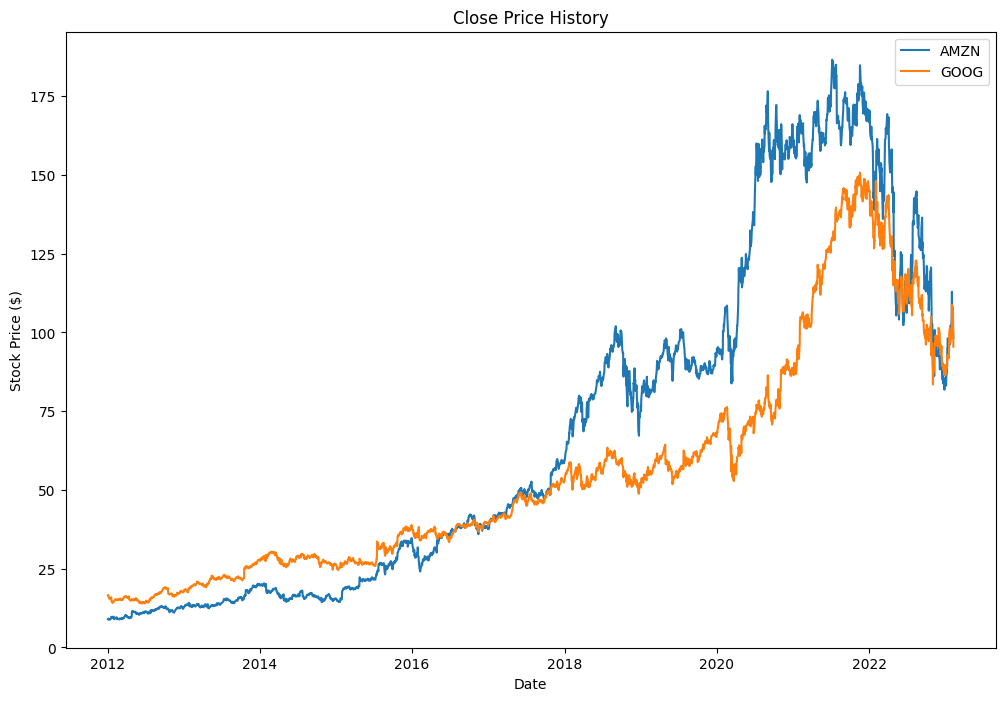

In [5]:
plt.figure(figsize=(12,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend(['AMZN', 'GOOG'])

In [6]:
data=df['Close']
data.head(20)

,AMZN,GOOG
Date,,
2012-01-03,8.9515,16.573130
2012-01-04,8.8755,16.644611
2012-01-05,8.8805,16.413727
2012-01-06,9.1305,16.189817
2012-01-09,8.9280,15.503389
2012-01-10,8.9670,15.520326
2012-01-11,8.9450,15.590563
2012-01-12,8.7965,15.682219
2012-01-13,8.9210,15.566403


4. Prepare the data

In [7]:
#convert to numpy aarray
#We use 80 of the data for training
train_pct=0.8  
dataset=data.values
train_data_len=math.ceil(len(dataset)*train_pct)

In [8]:
dataset.shape

(2795, 2)

In [9]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [10]:
scaled_data.shape

(2795, 2)

### The window we use is n_period as input

In [11]:
n_period=60
n_future = 5  # Number of future days to predict

#training dataset
train_data=scaled_data[0:train_data_len]
x_train=[]
y_train=[]

for i in range(n_period, len(train_data) - n_future + 1):
    x_train.append(train_data[i-n_period:i])
    y_train.append(train_data[i:i+n_future, 0])

# Convert x_train to numpy array and reshape
x_train = np.array(x_train).reshape(-1, n_period, 2)  # Assuming I have 2 features (AMZN, GOOG)   


In [12]:
x_train[0:1]

array([[[0.00087189, 0.01936668],
        [0.00044438, 0.01988927],
        [0.00047251, 0.01820133],
        [0.00187879, 0.01656439],
        [0.0007397 , 0.01154608],
        [0.00095908, 0.0116699 ],
        [0.00083533, 0.01218339],
        [0.        , 0.01285346],
        [0.00070032, 0.01200676],
        [0.0016116 , 0.01266045],
        [0.00379977, 0.01344889],
        [0.00520886, 0.01466158],
        [0.00421884, 0.0049054 ],
        [0.00285756, 0.00481982],
        [0.0031135 , 0.00398405],
        [0.00333851, 0.00190098],
        [0.00489104, 0.00164788],
        [0.00546762, 0.00381107],
        [0.00456197, 0.00339409],
        [0.00520605, 0.00383474],
        [0.00099283, 0.00396584],
        [0.00162847, 0.00474516],
        [0.00330476, 0.00678818],
        [0.00202785, 0.0091116 ],
        [0.00232318, 0.00868915],
        [0.00268599, 0.00924998],
        [0.00254536, 0.00954313],
        [0.00270287, 0.00853256],
        [0.00440447, 0.00967788],
        [0.004

In [13]:
y_train[0:1]

[array([0.00806642, 0.00747578, 0.00622138, 0.0066742 , 0.00507948])]

In [14]:
y_train[:2]

[array([0.00806642, 0.00747578, 0.00622138, 0.0066742 , 0.00507948]),
 array([0.00747578, 0.00622138, 0.0066742 , 0.00507948, 0.00519198])]

In [15]:
#Convert numpy array
x_train, y_train=np.array(x_train), np.array(y_train)



In [16]:
x_train.shape

(2172, 60, 2)

In [17]:
y_train.shape

(2172, 5)

In [18]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],2))
x_train.shape

(2172, 60, 2)

5. Train the model
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
loss function is chosen as mean_squared_error'

In [19]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],2)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
          

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(x_train,y_train, batch_size=1, epochs=1)

2172/2172 [==============================] - 48s 20ms/step - loss: 0.0012


In [22]:
#Test

# Extract the portion of the test data for prediction
test_data=scaled_data[train_data_len-60:,:]

# Prepare the test inputs (similar to training)
x_test = []
y_test = []

for i in range(n_period, len(test_data) - n_future + 1):
    x_test.append(test_data[i-n_period:i])
    y_test.append(test_data[i:i+n_future, 0])

# Convert x_test to numpy array and reshape
x_test = np.array(x_test).reshape(-1, n_period, 2)  # Assuming I have 2 features (AMZN, GOOG)





In [23]:
x_test.shape

(555, 60, 2)

6. Prediction error

In [24]:
scaled_data

array([[8.71892048e-04, 1.93666841e-02],
       [4.44381751e-04, 1.98892687e-02],
       [4.72507993e-04, 1.82013303e-02],
       ...,
       [5.24899607e-01, 6.88057775e-01],
       [5.13311875e-01, 6.29279368e-01],
       [5.03130379e-01, 5.96088573e-01]])

In [25]:
scaler.data_max_

array([186.57049561, 150.70899963])

In [26]:
scaler.data_min_

array([ 8.79650021, 13.92405891])

In [27]:
predictions_scaled=model.predict(x_test)

18/18 [==============================] - 1s 14ms/step


In [28]:
#predictions=scaler.inverse_transform(predictions)
predictions=predictions_scaled*(scaler.data_max_[0]-scaler.data_min_[0])+scaler.data_min_[0]

In [29]:
predictions.shape

(555, 1)

In [30]:
#RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

135.14122225960705

In [31]:
data.max()

AMZN    186.570496
GOOG    150.709000
dtype: float64

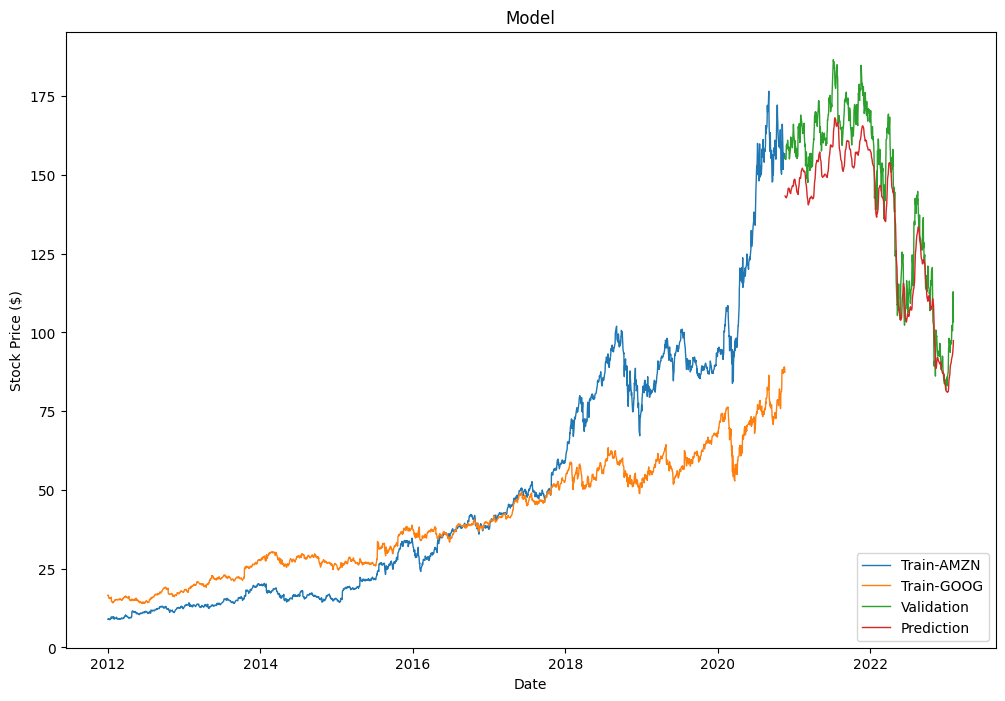

In [32]:
#plot the result
train=data[:train_data_len]
valid = data[train_data_len:train_data_len + len(predictions)]
valid = valid.assign(Predictions=predictions)
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.plot(train, lw=1)
plt.plot(valid[['AMZN','Predictions']], lw=1)
plt.legend(['Train-AMZN','Train-GOOG', 'Validation', 'Prediction'],loc='lower right')
plt.show()

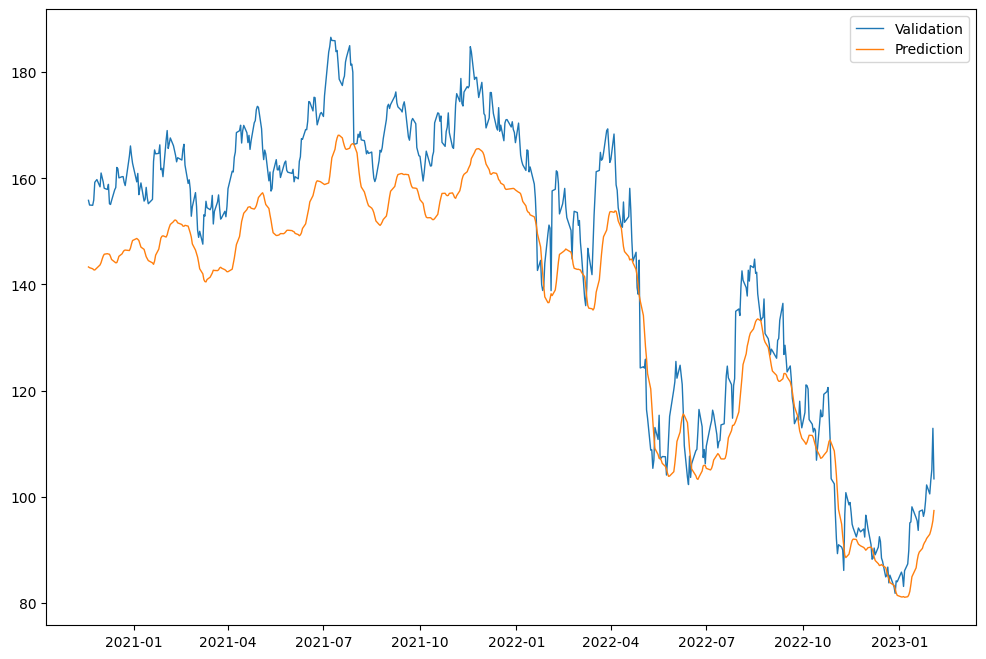

In [33]:
plt.figure(figsize=(12,8))
plt.plot(valid[['AMZN','Predictions']], lw=1)
plt.legend(['Validation', 'Prediction'])

### Group Assignment:
In the example, we use the last 60 day's price to predict the closing price for next day.  Modify the program to perform the following task:
- Use past 60 days price to predict the price in one week (5 days). 
- You can choose any stock. Also use two indices prices for input
- Use your prediction to generate trading signals for the testing periodd (20% of you dataset):  if the predicted price is higher than the current price (you can specify a threshold) , you should buy one share; if it is lower than the current preice, you can short one share.
- Assume that you will always close your position in onw week, caculate your accumaltaed PnL for testing data


In [34]:
predicted_prices = predictions[-n_future:]
print(predicted_prices)

[[92.95556]
 [93.62619]
 [94.4688 ]
 [95.5154 ]
 [97.41238]]


In [35]:
current_price = df['Close'].iloc[-1]
print("Current Price:", current_price)

Current Price: AMZN    98.239998
GOOG    95.459999
Name: 2023-02-09 00:00:00, dtype: float64


In [36]:
current_price = 98.239998
threshold = 12  # Change the threshold value as needed 

# Get the last n_future predictions
predicted_prices = predictions[-n_future:]

# Replicate current_price to match the length of predicted_prices
current_prices = np.full(predicted_prices.shape, current_price)

# Loop through the predicted prices and generate trading signals
for i, predicted_price in enumerate(predicted_prices):
    if predicted_price > current_prices[i] + threshold:
        # Buy one share
        print("Buy one share on day", i)
    else:
        # Short one share
        print("Short one share on day", i)


Short one share on day 0
Short one share on day 1
Short one share on day 2
Short one share on day 3
Short one share on day 4


In [37]:
position = 0  # Current position (0: no position, 1: long, -1: short)
pnl = 1  # Accumulated PnL
entry_price = current_prices[i]


In [38]:
pnl += position * (current_price - entry_price)  # Update the accumulated PnL
print("Accumulated PnL:", pnl)


Accumulated PnL: [1.]


In [39]:
pnl = 0.0
position = 0
entry_price = 0.0

threshold = 20  # Set the threshold value

# Determine the length for iteration
n = min(len(predicted_prices), len(test_data))

# Loop through the data and generate trading signals
for i in range(n):
    current_price = test_data[i]  # Get the current price for the current day
    predicted_price = predicted_prices[i]  # Get the predicted price for the current day

    if np.greater(predicted_price, current_price + threshold).any():
        if position != 1:  # If not already long, enter long position
            position = 1
            entry_price = current_price
    elif np.less(predicted_price, current_price - threshold).any():
        if position != -1:  # If not already short, enter short position
            position = -1
            entry_price = current_price

    if i % 2 == 0 and i != 0:
        pnl += position * (current_price - entry_price)  # Update the accumulated PnL
        position = 0  # Reset the position

# Print the accumulated PnL
print("Accumulated PnL:", pnl)


Accumulated PnL: [0.00228091 0.00678433]


Short position using a borrowing sugar example.

Imagine you have a neighbor who loves baking and always has a supply of sugar. One day, you notice that the price of sugar is quite high in the market and you believe it will decrease in the future. You see an opportunity to make a profit by taking a short position on sugar.

Here's how it works:

1. You approach your neighbor, who is willing to lend you a bag of sugar for a fee.
2. You borrow a bag of sugar from your neighbor and immediately sell it to someone else in the market at the current high price. You don't actually own the sugar; you've just borrowed it temporarily.
3. Now, you have cash from selling the sugar, but you still owe your neighbor a bag of sugar.
4. As time passes, you hope the price of sugar decreases, as you predicted. Let's say it does.
5. When the price of sugar has dropped to a level you're comfortable with, you decide to close your short position and buy a bag of sugar from the market.
6. With the cash you received from selling the sugar initially, you can now buy the bag of sugar at the lower price and return it to your neighbor.
7. You've profited from the price difference between when you sold the borrowed sugar and when you bought it back. You keep the difference as your profit, minus the borrowing fee paid to your neighbor.

In this example, your short position in sugar involved borrowing and selling an asset (sugar) that you didn't own with the expectation that its price would decrease. By buying it back at a lower price, you were able to profit from the price difference.

Short positions can be applied to various financial instruments, such as stocks, commodities, or currencies. The principle remains the same: selling an asset you don't own, expecting its price to decline, and buying it back at a lower price to make a profit.

This code calculates the accumulated PnL (Profit and Loss) based on the trading signals generated using predicted prices and current prices. Here's how it works:

1. Initialization:
   - `pnl = 0.0`: Initialize the accumulated PnL to zero.
   - `position = 0`: Initialize the position to zero (no position).
   - `entry_price = 0.0`: Initialize the entry price to zero.

2. Threshold:
   - `threshold = 20`: Set the threshold value. This is the difference between the predicted price and the current price that determines whether a trading signal should be generated.

3. Iteration:
   - Determine the length of iteration `n` based on the minimum length between `predicted_prices` and `test_data`.
   - Loop through the data from index 0 to index `n-1`.

4. Trading Signal Generation:
   - Get the current price for the current day from `test_data`.
   - Get the predicted price for the current day from `predicted_prices`.
   - Compare the predicted price with the current price using `np.greater()` and `np.less()` functions with the threshold.
   - If the predicted price is greater than the current price plus the threshold, and there is no existing long position (`position != 1`), enter a long position (`position = 1`) and set the entry price as the current price.
   - If the predicted price is less than the current price minus the threshold, and there is no existing short position (`position != -1`), enter a short position (`position = -1`) and set the entry price as the current price.

5. Accumulated PnL Calculation:
   - If the current index is divisible by 2 and not equal to 0 (`i % 2 == 0 and i != 0`), update the accumulated PnL (`pnl`) by adding the profit or loss from the position. The profit or loss is calculated as `position * (current_price - entry_price)`.
   - Reset the position to zero (`position = 0`) to close the position.

6. Print Accumulated PnL:
   - Print the accumulated PnL using `print("Accumulated PnL:", pnl)`.

The code calculates the accumulated PnL by iterating through the data, generating trading signals based on the predicted prices and current prices, and updating the accumulated PnL based on the trades made.